<a href="https://colab.research.google.com/github/elmedianikhadija/Non-linear-SVM/blob/main/Non_linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear SVM

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report 

In [23]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/elmedianikhadija/Non-linear-SVM/main/crab.csv')
df_1.head()

,Unnamed: 0,sp,sex,index,FL,RW,CL,CW,BD
0,1,B,M,1,8.1,6.7,16.1,19.0,7.0
1,2,B,M,2,8.8,7.7,18.1,20.8,7.4
2,3,B,M,3,9.2,7.8,19.0,22.4,7.7
3,4,B,M,4,9.6,7.9,20.1,23.1,8.2
4,5,B,M,5,9.8,8.0,20.3,23.0,8.2


In [24]:
df_data = df_1[['FL', 'RW']].to_numpy()
df_1['sex'].replace(['F','M'],[0,1],inplace=True)
df_target = df_1['sex'].to_numpy()

In [25]:
x_train, x_test, y_train , y_test = train_test_split(df_data,
                                                    df_target,
                                                    test_size = 0.25,
                                                    random_state = 5)

In [26]:
classifier = SVC(kernel = 'poly',gamma = 'auto' ,degree = 3, C = 10)
classifier.fit(x_train, y_train)

SVC(C=10, gamma='auto', kernel='poly')

In [27]:
def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
     # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
    
    plt.title(f'{a}')
    plt.show()


NameError: ignored

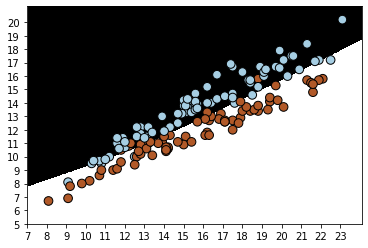

In [28]:
visualize_classifier(classifier, x_train, y_train)
#target_names = ['Class-' + str(int(i)) for i in set(df_target)]
print ("\n" + "#"*30)
print ("\nClassifier performance on training dataset\n")
print(classification_report(y_train,classifier.predict(x_train)))
print ("#"*30 + "\n") 